# Summary of experiments

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, time, pickle

sys.path.insert(1, '../../src/')
from aux import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"]=15,7.5
plt.rcParams.update({'font.size': 40})
fig_path='fig/'
fig_path='../../../madmix-tex/fig/'

In [106]:
########################
########################
#     load results    #
########################
########################

# mad mix
madmix_elbos=pkl_load('results/madmix_elbos_toydiscrete')
madmix_elbos=np.hstack((madmix_elbos,pkl_load('results/madmix_elbos_ising')))
madmix_elbos=np.hstack((madmix_elbos,pkl_load('results/madmix_elbos_gmm')))
madmix_elbos=madmix_elbos[-madmix_elbos<np.inf]

madmix_cput=pkl_load('results/madmix_cput_toydiscrete')
madmix_cput=np.hstack((madmix_cput,pkl_load('results/madmix_cput_ising')))
madmix_cput=np.hstack((madmix_cput,pkl_load('results/madmix_cput_gmm')))


# gibbs
gibbs_elbos=pkl_load('results/gibbs_elbos_toydiscrete')
gibbs_elbos=np.hstack((gibbs_elbos,pkl_load('results/gibbs_elbos_ising')))
gibbs_elbos=gibbs_elbos[-gibbs_elbos<np.inf]

gibbs_cput=pkl_load('results/gibbs_cput_toydiscrete')
gibbs_cput=np.hstack((gibbs_cput,pkl_load('results/gibbs_cput_ising')))
gibbs_cput=np.hstack((gibbs_cput,pkl_load('results/gibbs_cput_gmm')))


# mean field
meanfield_elbos=pkl_load('results/meanfield_elbos_toydiscrete')
meanfield_elbos=np.hstack((meanfield_elbos,pkl_load('results/meanfield_elbos_ising')))
meanfield_elbos=np.hstack((meanfield_elbos,pkl_load('results/meanfield_elbos_gmm')))
meanfield_elbos=meanfield_elbos[-meanfield_elbos<np.inf]

meanfield_cput=pkl_load('results/meanfield_cput_toydiscrete')
meanfield_cput=np.hstack((meanfield_cput,pkl_load('results/meanfield_cput_ising')))
meanfield_cput=np.hstack((meanfield_cput,pkl_load('results/meanfield_cput_gmm')))


# dequantization
dequant_elbos=pkl_load('results/dequant_elbos_toydiscrete')
dequant_elbos=np.vstack((dequant_elbos,pkl_load('results/dequant_elbos_ising')))
dequant_elbos=np.vstack((dequant_elbos,pkl_load('results/dequant_elbos_gmm')))

dequant_cput=pkl_load('results/dequant_cput_toydiscrete')
dequant_cput=np.vstack((dequant_cput,pkl_load('results/dequant_cput_ising')))
dequant_cput=np.vstack((dequant_cput,pkl_load('results/dequant_cput_gmm')))

dequant_density_cput = pkl_load('results/dequant_densitycput_toydiscrete')
dequant_density_cput = np.vstack((dequant_density_cput,pkl_load('results/dequant_densitycput_ising')))
dequant_density_cput = np.vstack((dequant_density_cput,pkl_load('results/dequant_densitycput_gmm')))


# concrete
concrete_elbos=pkl_load('results/concrete_elbos_toydiscrete')
concrete_elbos=np.vstack((concrete_elbos,pkl_load('results/concrete_elbos_ising')[np.newaxis,:]))
#concrete_elbos=concrete_elbos[-concrete_elbos<np.inf]

concrete_cput=pkl_load('results/concrete_cput_toydiscrete')
concrete_cput=np.vstack((concrete_cput,pkl_load('results/concrete_cput_ising')[np.newaxis,:]))
concrete_cput_gmm_pg=pkl_load('results/concrete_cput_gmm_pg')
concrete_cput_gmm_wf=pkl_load('results/concrete_cput_gmm_wf')
#concrete_cput=concrete_cput[concrete_cput>0]

concrete_density_cput = pkl_load('results/concrete_densitycput_toydiscrete')
concrete_density_cput = np.vstack((concrete_density_cput,pkl_load('results/concrete_densitycput_ising')))

## Together

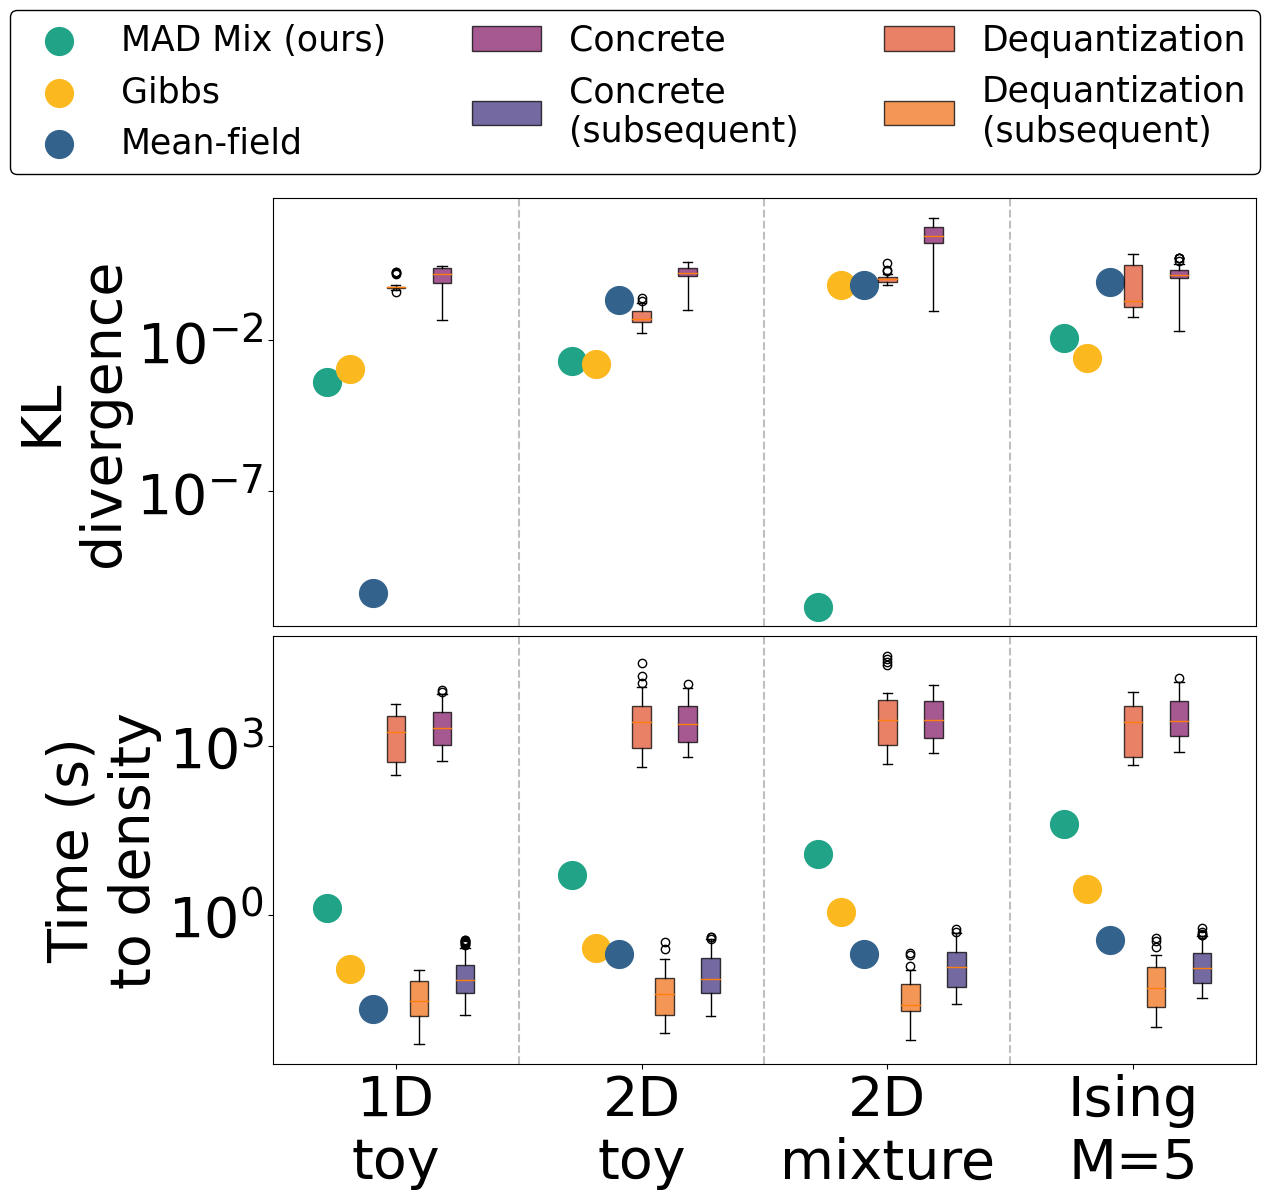

In [78]:
########################
########################
#      PLOTTING       #
########################
########################

# settings
fig, axs = plt.subplots(2,1, figsize=(12.5,10), constrained_layout=True)

increase=2
offset=0.25
marker_size=400

mad_offset=-2.25
gibbs_offset=-1.5
meanfield_offset=-0.75
dequant_offset=0.
dequant_density_offset=0.75
concrete_offset=1.5
concrete_density_offset=2.25

########################
########################
#      elbos plot      #
########################
########################

bps = [None for i in range(4)]
dequant_bps = [None for i in range(4)]
for i in range(4):
    axs[0].scatter([i*increase+mad_offset*offset],[-madmix_elbos[i]],s=marker_size,c='#20A386FF')
    axs[0].scatter([i*increase+gibbs_offset*offset],[-gibbs_elbos[i]],s=marker_size,c='#FBB91FFF')
    axs[0].scatter([i*increase+meanfield_offset*offset],[-meanfield_elbos[i]],s=marker_size,c='#33638D')
    
    conc_tmp=np.copy(concrete_elbos[i,:])
    conc_tmp=conc_tmp[-conc_tmp<np.inf]
    bps[i]=axs[0].boxplot(-conc_tmp,positions=[i*increase+concrete_offset*offset], patch_artist=True)
    
    dequant_tmp=np.copy(dequant_elbos[i,:])
    dequant_tmp=dequant_tmp[-dequant_tmp<np.inf]
    dequant_bps[i]=axs[0].boxplot(-dequant_tmp,positions=[i*increase+dequant_offset*offset], patch_artist=True)
# end for


# fill dequantization boxplots with colors
colors = ['#E25734' for i in range(4)]
i=0
for bplot in (dequant_bps[0],dequant_bps[1],dequant_bps[2],dequant_bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization')
        i=i+1
# end for


# fill concrete boxplots with colors
colors = ['#87216BFF' for i in range(4)]
i=0
for bplot in (bps[0],bps[1],bps[2],bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
# end for
        
axs[0].set_ylabel('KL\ndivergence')
axs[0].set_yscale('log')
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off



########################
########################
#    cpu times plot    #
########################
########################
plt.rcParams["legend.framealpha"]=1
plt.rcParams["legend.edgecolor"]='black'

dequant_bps = [None for i in range(4)]
dequant_bpsbis = [None for i in range(4)]

bps = [None for i in range(4)]
bpsbis = [None for i in range(4)]
for i in range(4):
    axs[1].scatter([i*increase+mad_offset*offset],[madmix_cput[i]],s=marker_size,c='#20A386FF',
                   label='MAD Mix (ours)' if i == 0 else '')
    axs[1].scatter([i*increase+gibbs_offset*offset],[gibbs_cput[i]],s=marker_size,c='#FBB91FFF',
                   label='Gibbs' if i == 0 else '')
    axs[1].scatter([i*increase+meanfield_offset*offset],[meanfield_cput[i]],s=marker_size,c='#33638D',
                   label='Mean-field' if i == 0 else '')
    
    conc_tmp=np.copy(concrete_cput[i,:])
    conc_tmp=conc_tmp[conc_tmp>0]
    bps[i]=axs[1].boxplot(conc_tmp,positions=[i*increase+concrete_offset*offset], patch_artist=True)
    conc_tmp=np.copy(concrete_density_cput[i,:])
    conc_tmp=conc_tmp[conc_tmp>0]
    bpsbis[i]=axs[1].boxplot(conc_tmp,positions=[i*increase+concrete_density_offset*offset], patch_artist=True)
    
    dequant_tmp=np.copy(dequant_cput[i,:])
    dequant_tmp=dequant_tmp[dequant_tmp>0]
    dequant_bps[i]=axs[1].boxplot(dequant_tmp,positions=[i*increase+dequant_offset*offset], patch_artist=True)
    dequant_tmp=np.copy(dequant_density_cput[i,:])
    dequant_tmp=dequant_tmp[dequant_tmp>0]
    dequant_bpsbis[i]=axs[1].boxplot(dequant_tmp,positions=[i*increase+dequant_density_offset*offset], patch_artist=True)
# end for


# add vertical lines
for i in range(3): # vline
    for j in range(2): # axis
        axs[j].axvline(x=i*increase + increase/2,c='grey',alpha=0.5,ls='dashed')
    # end for
# end for


# fill dequantization boxplots with colors
colors = ['#E25734' for i in range(4)]
i=0
for bplot in (dequant_bps[0],dequant_bps[1],dequant_bps[2],dequant_bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization')
        i=i+1
# end for


# fill dequantization subsequent boxplots with colors
colors = ['#F1731D' for i in range(4)]
i=0
for bplot in (dequant_bpsbis[0],dequant_bpsbis[1],dequant_bpsbis[2],dequant_bpsbis[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization\n(subsequent)')
        i=i+1
# end for


# fill concrete boxplots with colors
colors = ['#87216BFF' for i in range(4)]
i=0
for bplot in (bps[0],bps[1],bps[2],bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
# end for
        
# fill concrete subsequent density boxplots with colors
colors = ['#453781' for i in range(4)]
i=0
for bplot in (bpsbis[0],bpsbis[1],bpsbis[2],bpsbis[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete\n(subsequent)')
        i=i+1
# end for

axs[1].set_ylabel('Time (s)\nto density')
axs[1].set_yscale('log')
axs[1].set_xticks(ticks=[0,increase,2*increase,3*increase,],
                  labels=['1D\ntoy', '2D\ntoy', '2D\nmixture', 'Ising\nM=5']);


# set xlim to be the same
diff = 0.5*(increase+mad_offset*offset-concrete_density_offset*offset)
for j in range(2): axs[j].set_xlim(mad_offset*offset-diff,
                                   3*increase+concrete_density_offset*offset+diff)


handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0, 1.02, 1, 0.2), 
           loc="lower left",mode="expand", borderaxespad=0, ncol=3, fontsize=25)
#plt.savefig(fig_path+'summary_both_discrete.pdf', dpi=300, bbox_inches='tight')

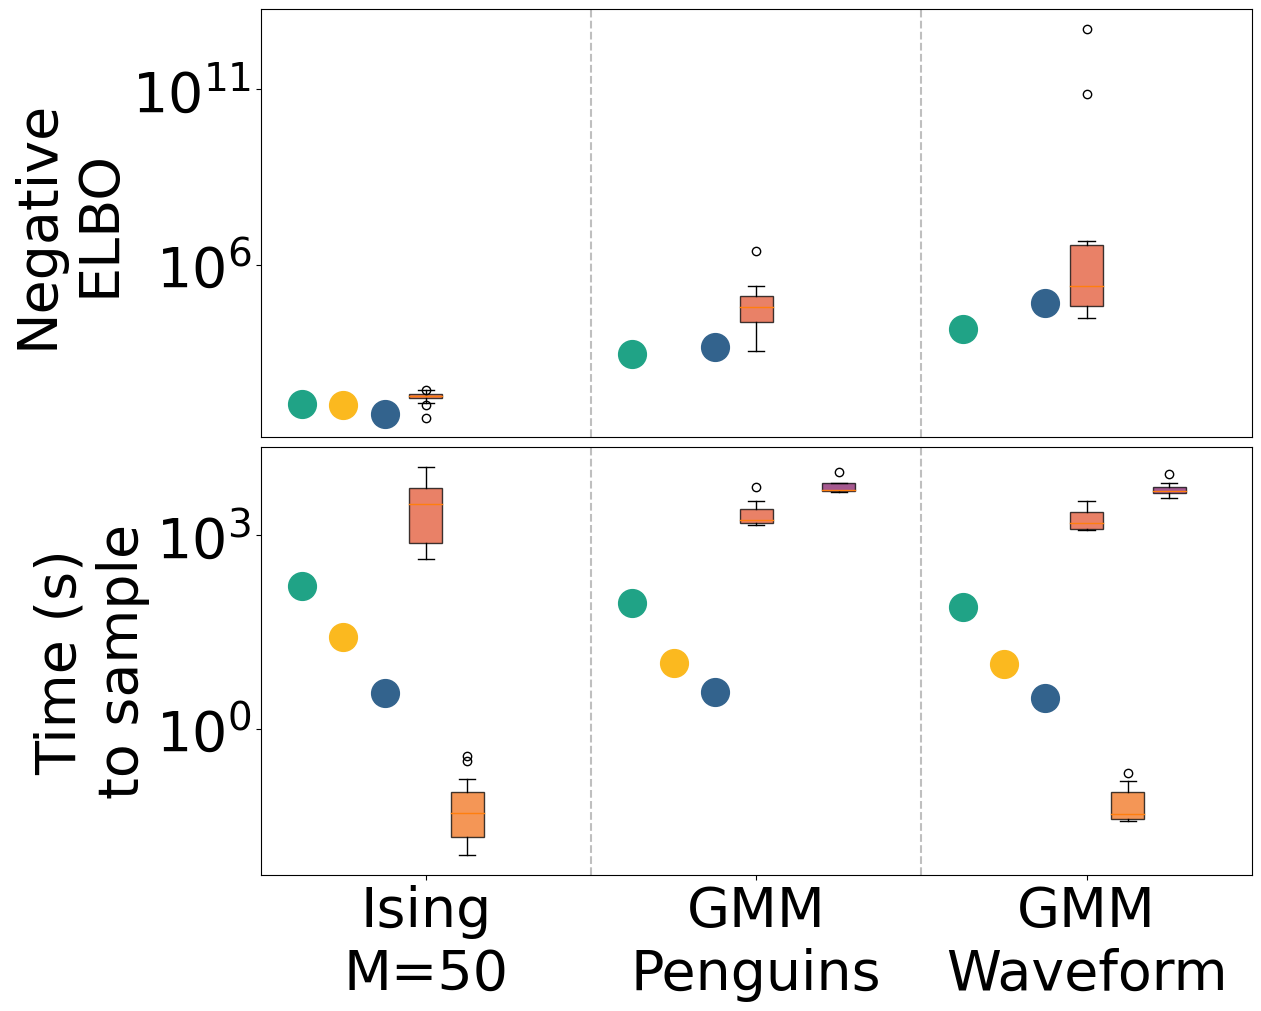

In [113]:
########################
########################
#      PLOTTING       #
########################
########################

# settings
fig, axs = plt.subplots(2,1, figsize=(12.5,10), constrained_layout=True)

increase=1.5
offset=0.25
marker_size=400

mad_offset=-2.25
gibbs_offset=-1.5
meanfield_offset=-0.75
dequant_offset=0.
dequant_density_offset=0.75
concrete_offset=1.5
concrete_density_offset=2.25

########################
########################
#      elbos plot      #
########################
########################

dequant_bps = [None for i in range(3)]
for i in range(3):
    axs[0].scatter([i*increase+mad_offset*offset],[300-madmix_elbos[i+4]],s=marker_size,c='#20A386FF')
    axs[0].scatter([i*increase+meanfield_offset*offset],[300-meanfield_elbos[i+4]],s=marker_size,c='#33638D')
    if i==0: axs[0].scatter([i*increase+gibbs_offset*offset],[300-gibbs_elbos[i+4]],s=marker_size,c='#FBB91FFF')
        
    dequant_tmp=np.copy(dequant_elbos[i+4,:])
    dequant_tmp=dequant_tmp[-dequant_tmp<np.inf]
    dequant_bps[i]=axs[0].boxplot(300-dequant_tmp,positions=[i*increase+dequant_offset*offset], patch_artist=True)
# end for

# fill dequantization boxplots with colors
colors = ['#E25734' for i in range(3)]
i=0
for bplot in (dequant_bps[0],dequant_bps[1],dequant_bps[2]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization')
        i=i+1
# end for




axs[0].set_ylabel('Negative\nELBO')
axs[0].set_yscale('log')
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


########################
########################
#    cpu times plot    #
########################
########################
plt.rcParams["legend.framealpha"]=1
plt.rcParams["legend.edgecolor"]='black'
bps = [axs[1].boxplot(concrete_cput_gmm_pg,positions=[1*increase+concrete_offset*offset], patch_artist=True), 
       axs[1].boxplot(concrete_cput_gmm_wf,positions=[2*increase+concrete_offset*offset], patch_artist=True)]

dequant_bps = [None for i in range(3)]
dequant_bpsbis = [None for i in range(3)]

for i in range(3):
    axs[1].scatter([i*increase+mad_offset*offset],[madmix_cput[i+4]],s=marker_size,c='#20A386FF',
                   label='Mad Mix (ours)' if i == 0 else '')
    axs[1].scatter([i*increase+gibbs_offset*offset],[gibbs_cput[i+4]],s=marker_size,c='#FBB91FFF',
                   label='Gibbs' if i == 0 else '')
    axs[1].scatter([i*increase+meanfield_offset*offset],[meanfield_cput[i+4]],s=marker_size,c='#33638D',
                   label='Mean-field' if i == 0 else '')
    
    dequant_tmp=np.copy(dequant_cput[i+4,:])
    dequant_tmp=dequant_tmp[dequant_tmp>0]
    dequant_bps[i]=axs[1].boxplot(dequant_tmp,positions=[i*increase+dequant_offset*offset], patch_artist=True)
    dequant_tmp=np.copy(dequant_density_cput[i+4,:])
    dequant_tmp=dequant_tmp[dequant_tmp>0]
    dequant_bpsbis[i]=axs[1].boxplot(dequant_tmp,positions=[i*increase+dequant_density_offset*offset], patch_artist=True)
# end for

# fill dequantization boxplots with colors
colors = ['#E25734' for i in range(3)]
i=0
for bplot in (dequant_bps[0],dequant_bps[1],dequant_bps[2]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization')
        i=i+1
# end for


# fill dequantization subsequent boxplots with colors
colors = ['#F1731D' for i in range(3)]
i=0
for bplot in (dequant_bpsbis[0],dequant_bpsbis[1],dequant_bpsbis[2]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization\n(subsequent)')
        i=i+1
# end for

# fill concrete boxplots with colors
colors = ['#87216BFF' for i in range(2)]
i=0
for bplot in (bps[0],bps[1]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1

axs[1].set_ylabel('Time (s)\nto sample')
axs[1].set_yscale('log')
axs[1].set_xticks(ticks=[0,increase,2*increase],
                  labels=['Ising\nM=50','GMM\nPenguins','GMM\nWaveform']);


# add vertical lines
for i in range(2): # vline
    for j in range(2): # axis
        axs[j].axvline(x=i*increase + increase/2,c='grey',alpha=0.5,ls='dashed')
    # end for
# end for

# set xlim to be the same
diff = 0.5*(increase+mad_offset*offset-concrete_density_offset*offset)
for j in range(2): axs[j].set_xlim(mad_offset*offset-diff,
                                   2*increase+concrete_density_offset*offset+diff)


handles, labels = axs[1].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(0, 1.02, 1, 0.2), 
#           loc="lower left",mode="expand", borderaxespad=0, ncol=4, fontsize=26)
#plt.savefig(fig_path+'summary_both_cont.pdf', dpi=300, bbox_inches='tight')